# TP3 IIA

## Integrantes

* Juan Ignacio García (a2008)
* Rodrigo Mesa Marchi (a2016)
* Danilo Simón Reitano Andrades (a2020)

### Tareas y preguntas a resolver

1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?
1. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).
1. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.
1. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).
1. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?
1. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.
1. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

In [4]:
dataset = pd.read_csv("spambase.csv") # cargando los datos desde un CSV
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


In [5]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()

In [43]:
df = column_sum.melt("spam").copy()#[dataset["spam"]==0].sort_values("value").head(10)
df["word"] = df["variable"].str.replace("word_freq_","").str.replace("char_freq_","")
df = df.drop(columns=["variable"],axis=0)

In [44]:
df_max_normal = df[df["spam"]==0].sort_values("value",ascending=False).head(10).copy()
df_max_normal

,spam,value,word
36,0,3541702,you
52,0,3527559,george
48,0,2496576,hp
22,0,1495268,will
40,0,1223098,your
50,0,1204398,hpl
88,0,1159138,re
90,0,800669,edu
2,0,681569,address
82,0,604460,meeting


In [45]:
df_max_spam = df[df["spam"]==1].sort_values("value",ascending=False).head(10).copy()
df_max_spam

,spam,value,word
37,1,4105599,you
41,1,2502597,your
23,1,997100,will
31,1,939790,free
9,1,931799,our
103,1,931352,!
5,1,732080,all
19,1,635470,mail
35,1,578759,email
33,1,521250,business


In [41]:
s1 = pd.merge(df_max_normal, df_max_spam, how='inner', on=['word'])

In [42]:
s1

,spam_x,value_x,word,spam_y,value_y
0,0,3541702,you,1,4105599
1,0,1495268,will,1,997100
2,0,1223098,your,1,2502597


In [50]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = dataset["spam"]

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

#### NaibeBayes

In [ ]:
nb_regressor = MultinomialNB(alpha = 1)

nb_regressor.fit(X_train, y_train)

MultinomialNB(alpha=1)

#### Logistical Regression

In [58]:
numerical_columns = X_train.columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num",MinMaxScaler(), numerical_columns)
    ]
)



pipe = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("regressor",LogisticRegression())



    ]
)
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_...
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#'],
      dtype='object'))])),
                ('regressor', LogisticRegression())])

In [59]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_...
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#'],
      dtype='object'))])),
                ('regressor', LogisticRegression())])

In [60]:
y_pred_nb = nb_regressor.predict(X_test)
y_pred_lr = pipe.predict(X_test)

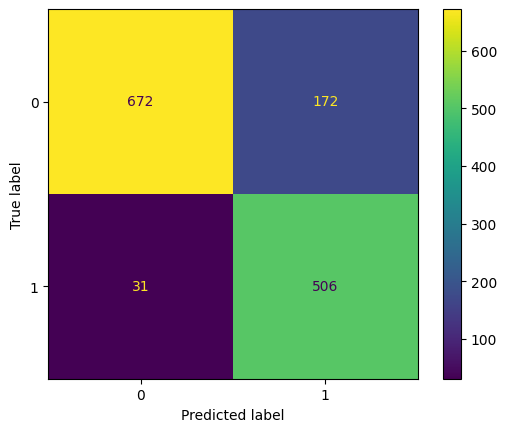

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred_nb)).plot()

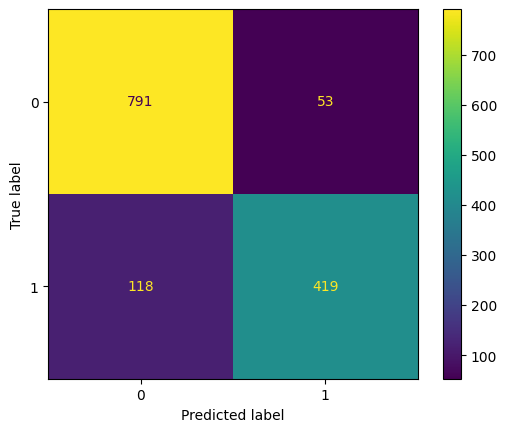

In [65]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred_lr)).plot()

In [67]:
def print_scores(y_true, y_pred):
    print(f"El valor de accuracy resulta: {accuracy_score(y_true, y_pred)}")
    print(f"El valor de precision_score resulta: {precision_score(y_true, y_pred)}")
    print(f"El valor de recall_score resulta: {recall_score(y_true, y_pred)}")

#### Metricas Naibe Bayes

In [ ]:
print_scores(y_test, y_pred_nb)

El valor de accuracy resulta: 0.8530050687907313
El valor de precision_score resulta: 0.7463126843657817
El valor de recall_score resulta: 0.9422718808193669


#### Metricas Logistic Regression

In [69]:
print_scores(y_test, y_pred_lr)

El valor de accuracy resulta: 0.8761766835626358
El valor de precision_score resulta: 0.8877118644067796
El valor de recall_score resulta: 0.7802607076350093


### ROC

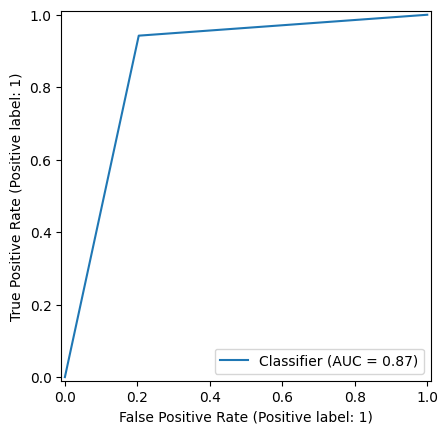

In [ ]:
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_nb)

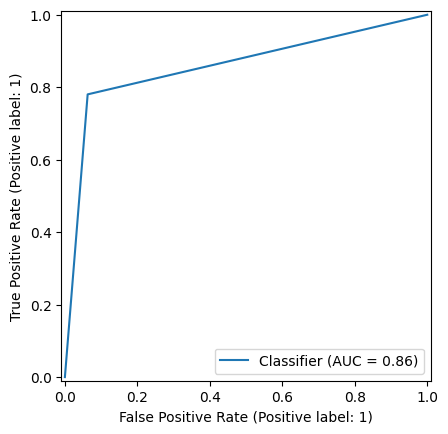

In [79]:
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lr)